In [19]:
%matplotlib inline
from astropy.io import fits
from astropy import units as u
import os
import pickle as pickle
from astropy.stats import sigma_clipped_stats
from astropy.time import Time
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sys;print(sys.prefix)

C:\Users\taiwe\anaconda3


In [20]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle
import os
import pandas as pd

from spec_utils.spec_utils import read_irs

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


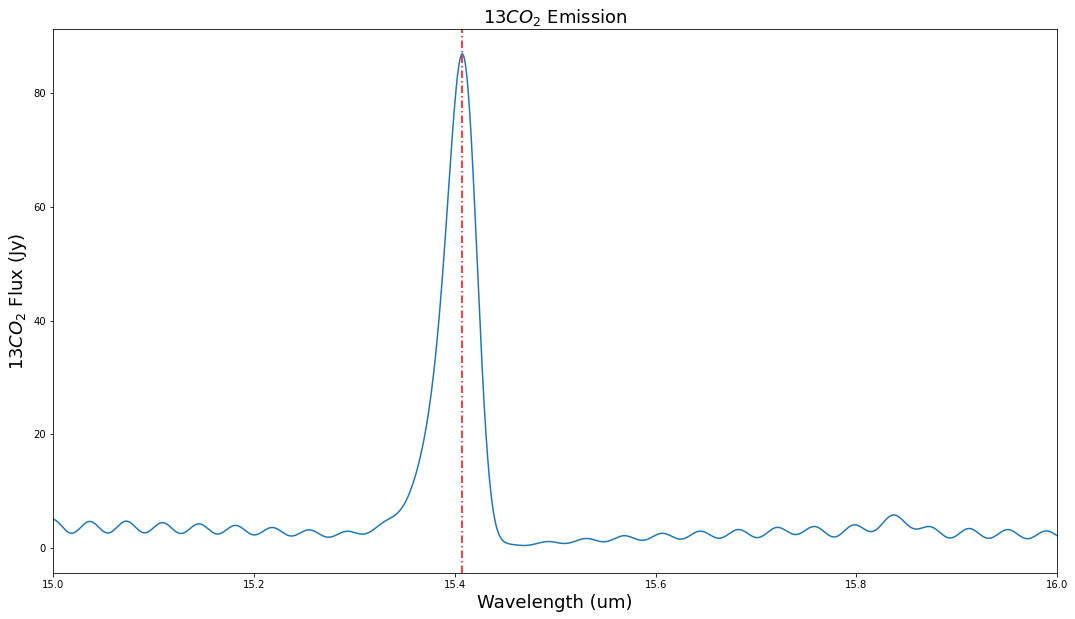

In [21]:
out_13co2=pickle.load(open(r"C:\Users\taiwe\Documents\13co2_1e19_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_13co2['spectrum']['wave'],out_13co2['spectrum']['convolflux'])
plt.xlim(15, 16)
plt.title('13$CO_2$ Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('13$CO_2$ Flux (Jy)',fontsize=18)

from scipy.signal import find_peaks
p13 = find_peaks(out_13co2['spectrum']['convolflux'], height=20)
peak13 = out_13co2['spectrum']['wave'][p13[0][0]]
plt.axvline(x=peak13,c='red', dashes=(5, 2, 1, 2))

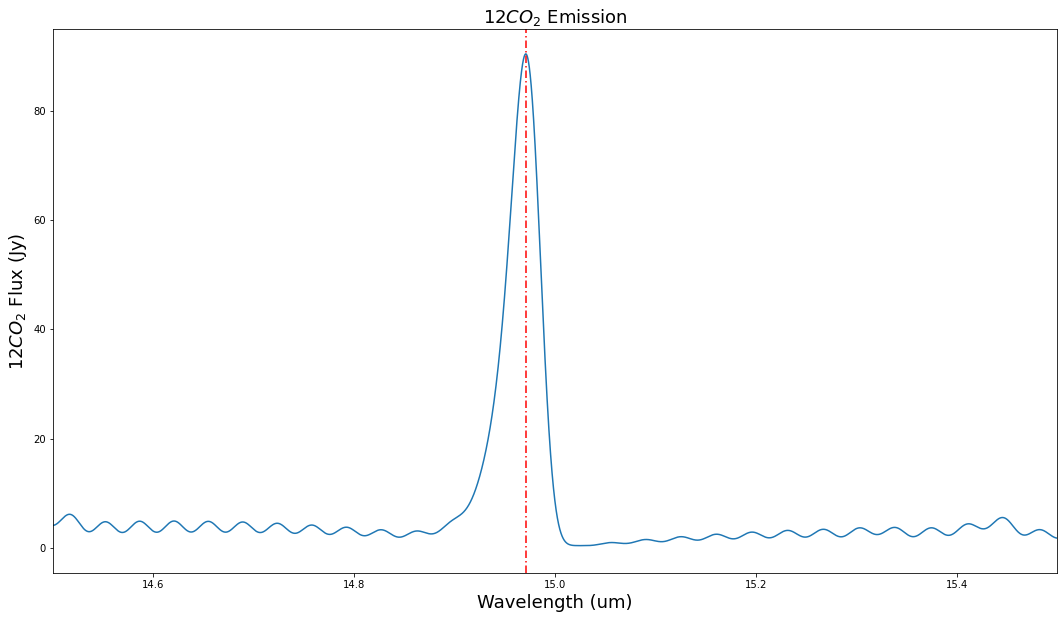

In [22]:
out_12co2=pickle.load(open(r"C:\Users\taiwe\Documents\co2_1e19_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_12co2['spectrum']['wave'],out_12co2['spectrum']['convolflux'])
plt.xlim(14.5, 15.5)
plt.title('12$CO_2$ Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('12$CO_2$ Flux (Jy)',fontsize=18)

from scipy.signal import find_peaks
p12 = find_peaks(out_12co2['spectrum']['convolflux'], height=20)
peak12 = out_12co2['spectrum']['wave'][p12[0][0]]
plt.axvline(x=peak12,c='red', dashes=(5, 2, 1, 2))

Text(0, 0.5, '$H_2$16O Flux (Jy)')

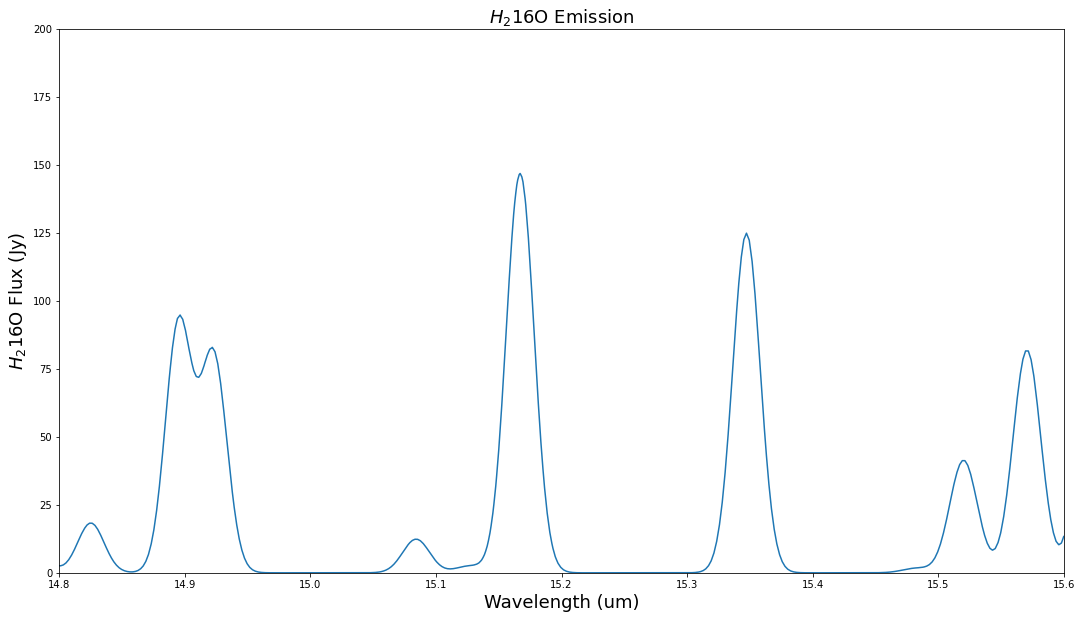

In [60]:
out_H216O=pickle.load(open("Docs\h2o_1e22_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_H216O['spectrum']['wave'],out_H216O['spectrum']['convolflux'])
plt.xlim(14.8, 15.6)
plt.ylim(0, 200)
plt.title('$H_2$16O Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('$H_2$16O Flux (Jy)',fontsize=18)

Text(0, 0.5, '$H_2$18O Flux (Jy)')

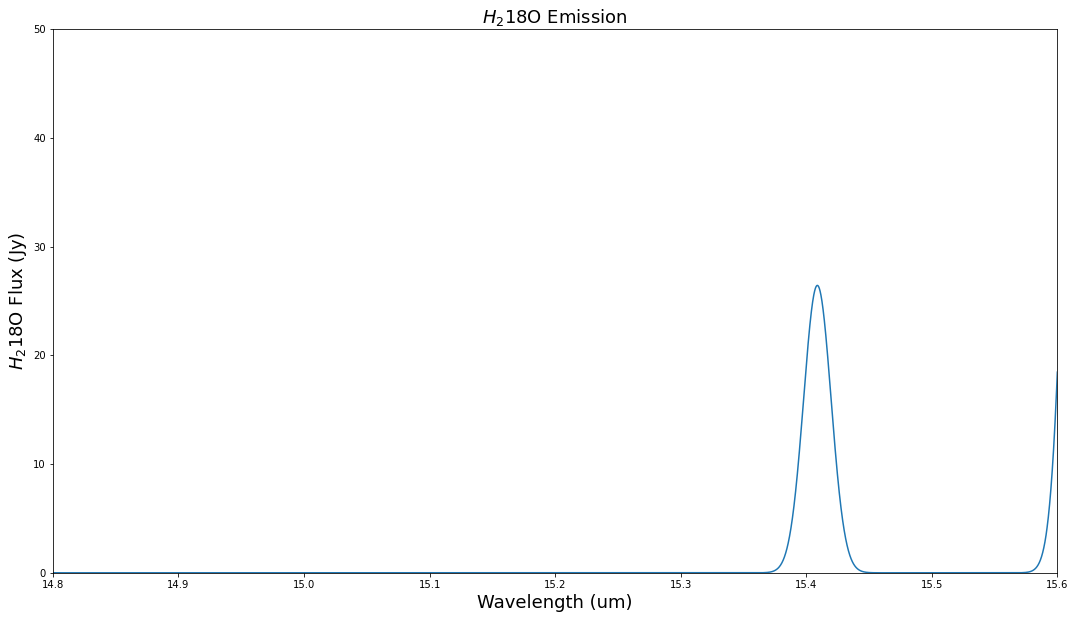

In [62]:
out_H218O=pickle.load(open("Docs\h218o_1e22_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_H218O['spectrum']['wave'],out_H218O['spectrum']['convolflux'])
plt.xlim(14.8, 15.6)
plt.ylim(0, 50)
plt.title('$H_2$18O Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('$H_2$18O Flux (Jy)',fontsize=18)

(-0.1, 0.5)

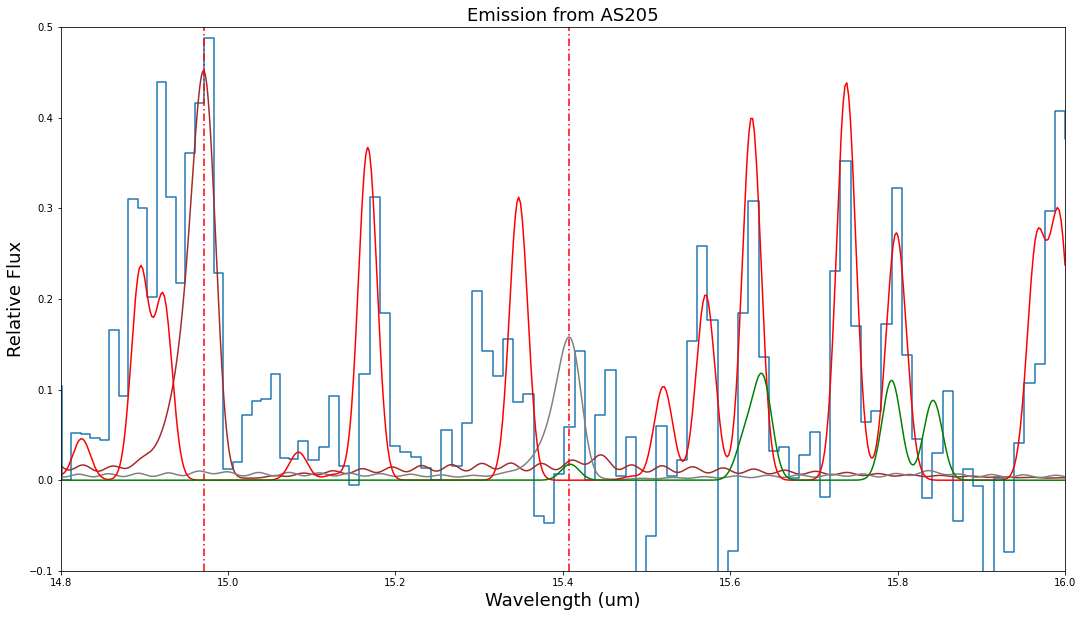

In [155]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 200

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 550

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 1500
plt.plot(flux181, flux182, c='green')

plt.title('Emission from AS205',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.1, .5)

(-0.1, 0.5)

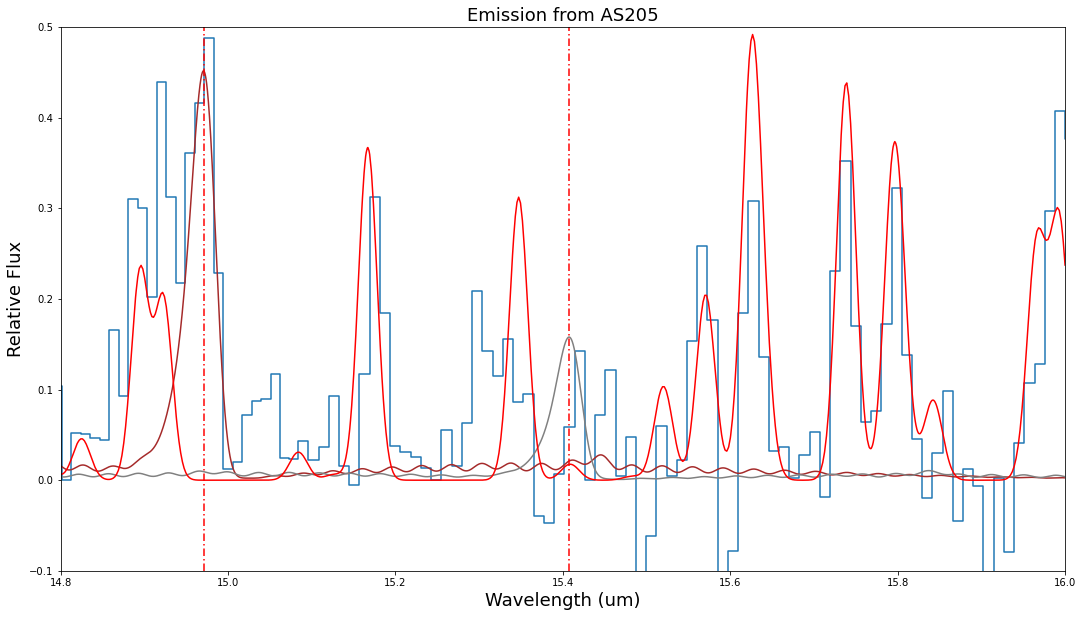

In [156]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 200

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 550

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 400

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 1500

totflux = flux162+flux182
plt.plot(flux161, totflux, c='red')

plt.title('Emission from AS205',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.1, .5)

(-0.05, 0.15)

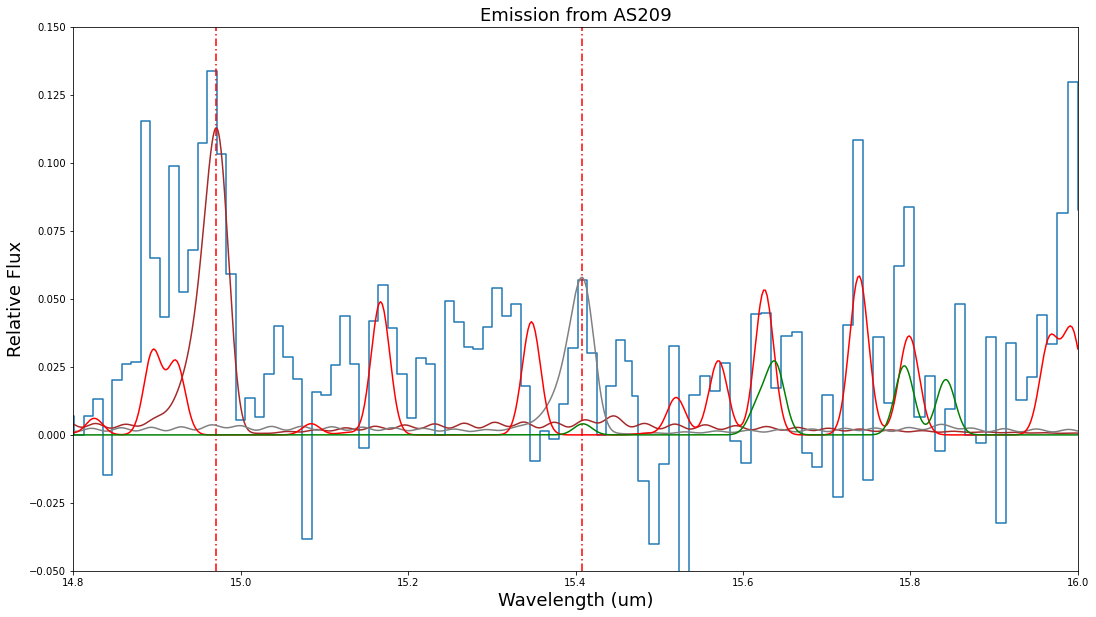

In [158]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 800

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 1500

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 3000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('V1121OPH',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 6500
plt.plot(flux181, flux182, c='green')

plt.title('Emission from AS209',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.05, 0.15)

(-0.05, 0.15)

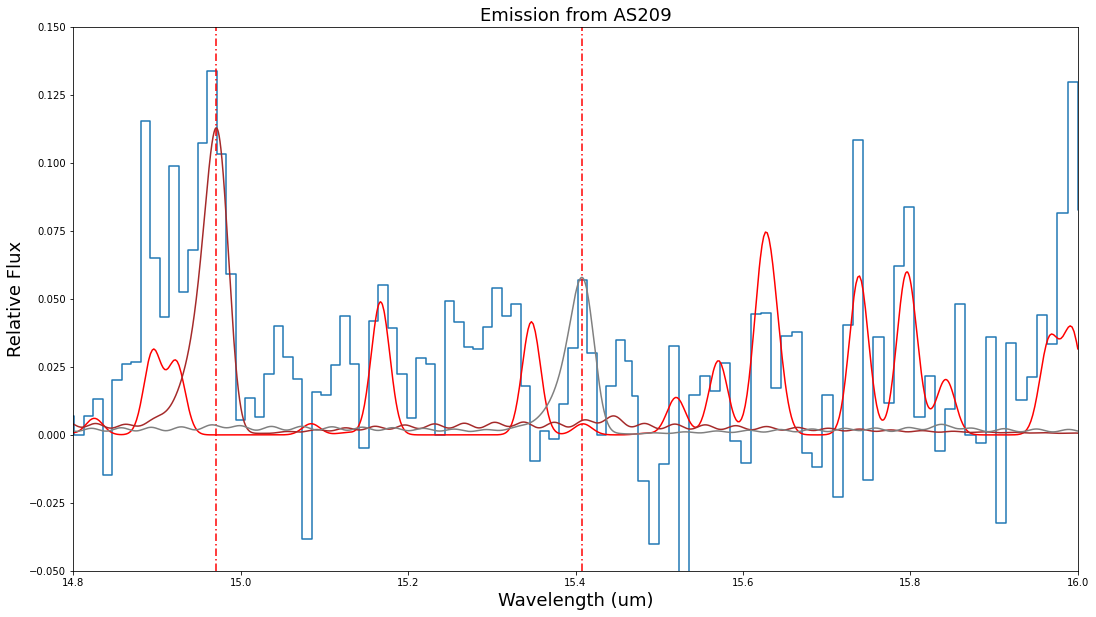

In [119]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 800

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 1500

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 3000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('V1121OPH',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 6500
totflux = flux162+flux182
plt.plot(flux161, totflux, c='red')
plt.plot(flux121, flux122, c='brown')
plt.plot(flux131, flux132, c='grey')

plt.title('Emission from AS209',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.05, 0.15)

(-0.01, 0.035)

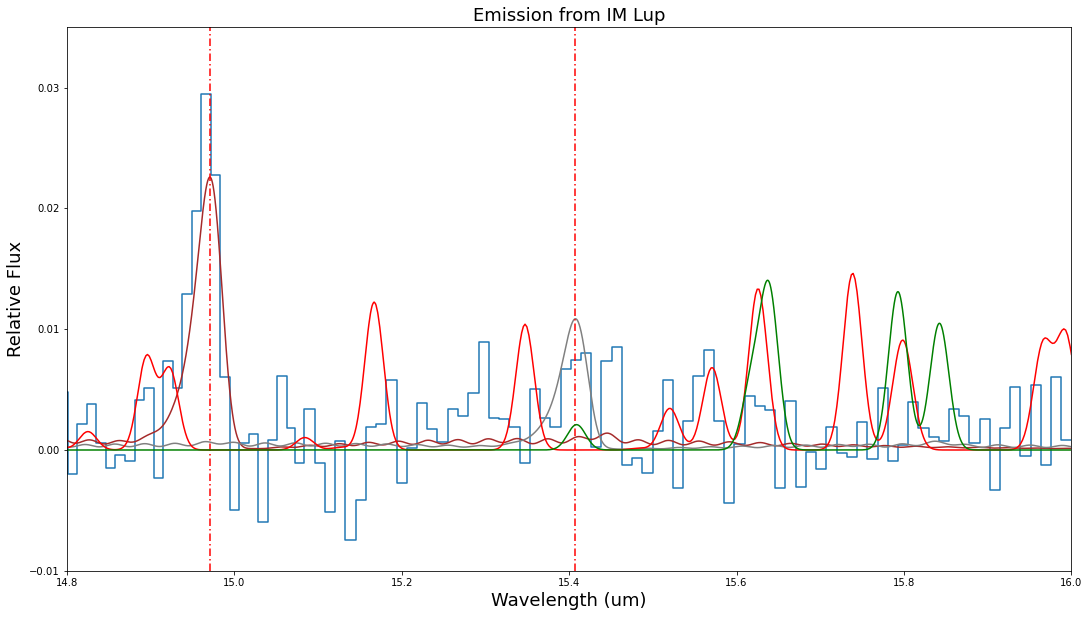

In [88]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('IMLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux+0.005-((gwlup.wave-14.8)*0.0075), drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 12000
plt.plot(flux161, flux162, c='red')

flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 12600
plt.plot(flux181, flux182, c='green')

plt.title('Emission from IM Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.01, .035)

(-0.015, 0.05)

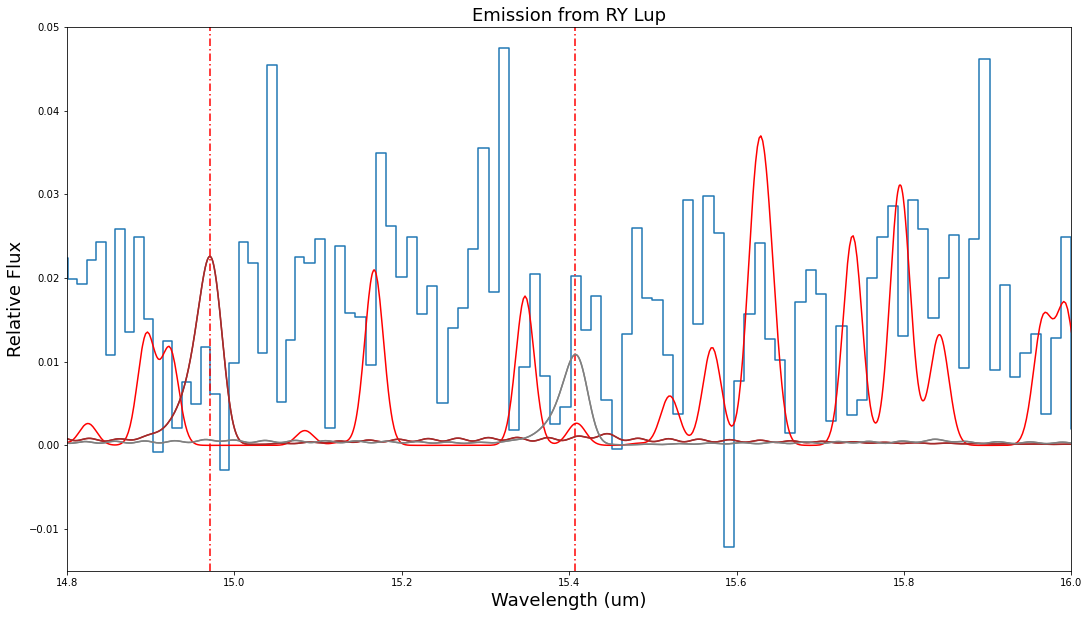

In [138]:
fig=plt.figure(1,figsize=(18,10))
flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('RYLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux+0.02-((gwlup.wave-14.8)*0.01), drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

flux161 = out_H216O['spectrum']['wave']
flux162 = out_H216O['spectrum']['convolflux'] / 7000
flux181 = out_H218O['spectrum']['wave']
flux182 = out_H218O['spectrum']['convolflux'] / 10000
totflux = flux162+flux182
plt.plot(flux161, totflux, c='red')
plt.plot(flux121, flux122, c='brown')
plt.plot(flux131, flux132, c='grey')

plt.title('Emission from RY Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 16)
plt.ylim(-.015, .05)

(-0.02, 0.3)

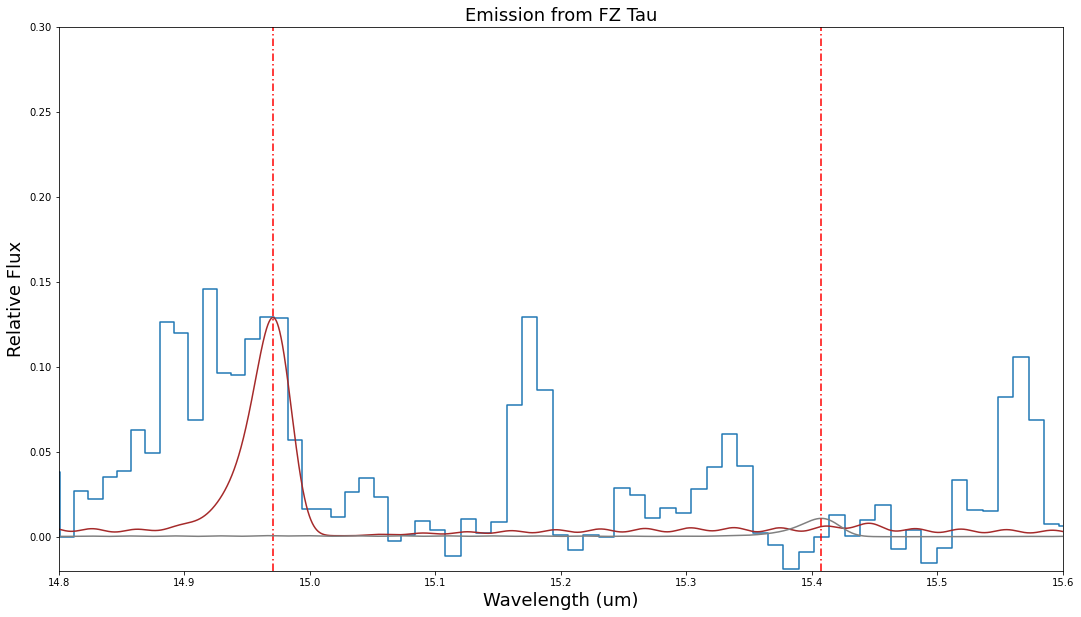

In [139]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 700

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('FZTAU',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from FZ Tau',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .3)

(-0.02, 0.035)

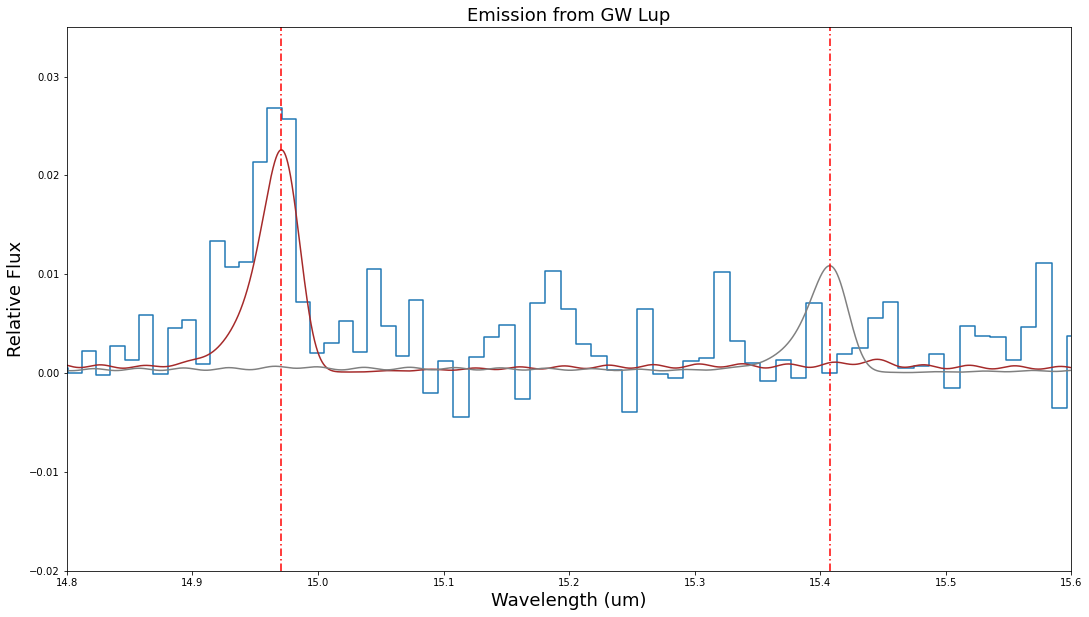

In [144]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('GWLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from GW Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .035)

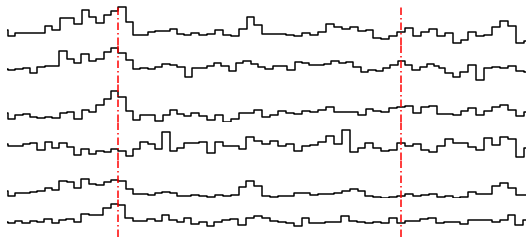

In [252]:
gridspec_kw = dict(
    height_ratios=(1, 1,1,1,1,1),
    hspace=0,
)
r = 6
fig, axes = plt.subplots(
    nrows=r, ncols=1, sharex=True, gridspec_kw=gridspec_kw,
)

path = os.getcwd() + '/REDUCED/'
as205=read_irs('AS205_c2d',dd=path,noerror=True)
as209=read_irs('V1121OPH',dd=path,noerror=True)
imlup=read_irs('IMLUP',dd=path,noerror=True)
rylup=read_irs('RYLUP',dd=path,noerror=True)
fztau=read_irs('FZTAU',dd=path,noerror=True)
gwlup=read_irs('GWLUP',dd=path,noerror=True)


axes[0].plot(as205.wave,as205.flux, drawstyle='steps-mid', c='black')
axes[0].set_ylim(-.15, .5)
axes[1].plot(as209.wave,as209.flux, drawstyle='steps-mid', c='black')
axes[1].set_ylim(-.075, .15)
axes[2].plot(imlup.wave,imlup.flux, drawstyle='steps-mid', c='black')
axes[2].set_ylim(-.01, .035)
axes[3].plot(rylup.wave,rylup.flux, drawstyle='steps-mid', c='black')
axes[3].set_ylim(-.03, .05)
axes[4].plot(fztau.wave,fztau.flux, drawstyle='steps-mid', c='black')
axes[4].set_ylim(-.02, .3)
axes[5].plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid', c='black')
axes[5].set_ylim(-.02, .035)

for i in range(r):
    axes[i].axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
    axes[i].axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))
    i=i+1

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
axes[4].axis('off')
axes[5].axis('off')
plt.xlim(14.8, 15.6)

plt.show()

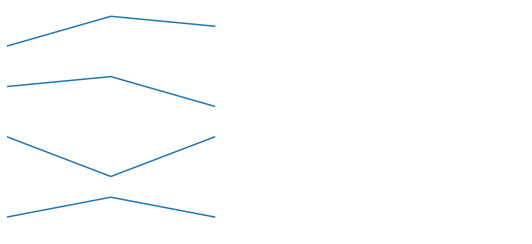

In [218]:
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
ax1 = plt.subplot(4,1, 1)
ax1.axis('off')
ax1.set_xlim(left=0, right=5)
ax1.set_ylim(bottom=0, top=5)
ax1.plot([1, 4, 3])
ax2 = plt.subplot(4, 1, 2, sharey=ax1, sharex=ax1)
ax2.plot([3, 4, 1])
ax2.axis('off')
ax3 = plt.subplot(4, 1, 4, sharey=ax1, sharex=ax1)
ax3.plot([2, 4, 2])
ax3.axis('off')
ax4 = plt.subplot(4, 1, 3, sharey=ax1, sharex=ax1)
ax4.plot([4, 0, 4])
ax4.axis('off')



plt.show()



In [24]:
!pip install spectools-ir